In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from useful_functions import *
from opt_function import * 

注意, 这里对于pull sum算法的warm up就是真的直接让初始的$V=A^{i_0}$

A的第二大特征值: 0.18130455471024276
A的beta: 0.35642806112761855
A的spectral gap: 0.6435719388723815
A的kappa: 2.3714218754086454
S_A是: 14.185201951113974 



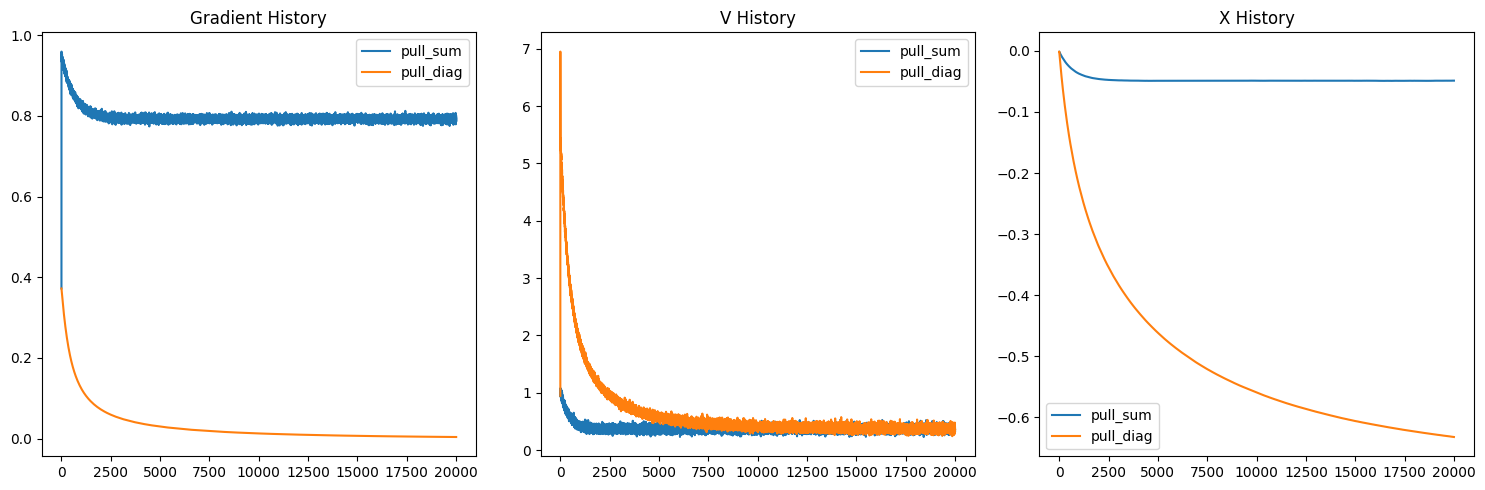

In [37]:
# 初始化参数和数据
n = 6
d = 10
L = 200
A = get_mat1(n).T
show_row(A)
init_x = init_x_func(n=n, d=d, seed=42)
h, y, x_opt, x_star = init_data(n=n, d=d, L=L, seed=4989, sigma_h=0.1)

max_it = 20000
sigma_n = 5e-3
lr = 1e-3
rho = 1e-3

# 运行 pull_sum 程序
result_sum = pull_sum(
    A=A,
    init_x=init_x,
    h_data=h,
    y_data=y,
    grad_func=grad,
    grad_f_bar_func=grad_f_bar_x,
    d=d,
    rho=rho,
    lr=lr,
    sigma_n=sigma_n,
    max_it=max_it,
    mg=1,
    warm_up=10,
)

# 运行 pull_diag 程序
result_diag = pull_diag(
    A=A,
    init_x=init_x,
    h_data=h,
    y_data=y,
    grad_func=grad,
    grad_f_bar_func=grad_f_bar_x,
    d=d,
    rho=rho,
    lr=lr,
    sigma_n=sigma_n,
    max_it=max_it,
    mg=1,
)

# 绘制 gradient_history 比较图
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(result_sum["gradient_history"], label="pull_sum")
plt.plot(result_diag["gradient_history"], label="pull_diag")
plt.title("Gradient History")
plt.legend()

# 绘制 v_history 比较图
plt.subplot(1, 3, 2)
plt.plot(result_sum["v_history"], label="pull_sum")
plt.plot(result_diag["v_history"], label="pull_diag")
plt.title("V History")
plt.legend()

# 绘制 x_history 比较图
plt.subplot(1, 3, 3)
plt.plot(result_sum["x_history"], label="pull_sum")
plt.plot(result_diag["x_history"], label="pull_diag")
plt.title("X History")
plt.legend()

plt.tight_layout()
plt.show()